# PyGMT - first figure and subplot 
https://www.pygmt.org/latest/index.html

This tutorial will cover the fundamental concepts behind making figures with PyGMT: importing the package, creating a blank figure, drawing coastlines, drawing a map frame, choosing a projection, and subplot in a figure.

##### Preworkshop in 2024 AGU Fall Meeting in Washington, DC, United States
###### Jing-Hui Tong | jhtong33@gmail.com | National Taiwan University

:::{tip}
In Jupyter, some shortcut key will increase your learning curve!
* Run cell: `Shift`+`Enter`
* Code indentation: `TAB`
* Code dedenting: `Shift`+`TAB`
* Writing single-line comments: begining with **#** or `Command`+`/`
* Auto-completion: `TAB` while you writing some code
:::

## Importing 

First thing to do is load PyGMT (`import`) so that we can access its functionality. 

PyGMT has a flat package layout, meaning that you can access everything in it with a single `import`.

In [35]:
import pygmt

## Starting your first figure
Every figure must start with the creation of a [`pygmt.Figure`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.html#pygmt.Figure)

In [36]:
fig = pygmt.Figure()

We have blank canvas in the `fig` variable now, we will overlay elements and show it on same `fig`. 

## Drawing coastline -- [`fig.coast`](https://www.pygmt.org/dev/api/generated/pygmt.Figure.coast.html)
Before plotting, you need to define 
1. `region`: controling the geographic or Cartesian extent of the figure. Regions are specified as lists of `[xmin, xmax, ymin, ymax]`. Another shortcut, `region='g'`, which specifies a **global** domain.
2. `projection`: controling the map projection. GMT (and therefore PyGMT) supports 31 different map projections, from basic Cartesian axes to [arbitrary vertical perspectives](https://docs.generic-mapping-tools.org/latest/gallery/ex26.html). Again, if you're familiar with GMT, these are specified using the `-J` flag, as in `-JM4i`. In PyGMT, projections codes are still strings, but the `J` is dropped, so an equivalent PyGMT argument would be `projection='M4i'`.

> Determining the size of your images `4i`, the size will affect how large of your following fontsize and markersize
>> **length unit** `c`: cm / `i`: inch(2.54 cm) / `p`: point(1/72 of an inch)

> More projections please click https://www.pygmt.org/latest/projections/index.html

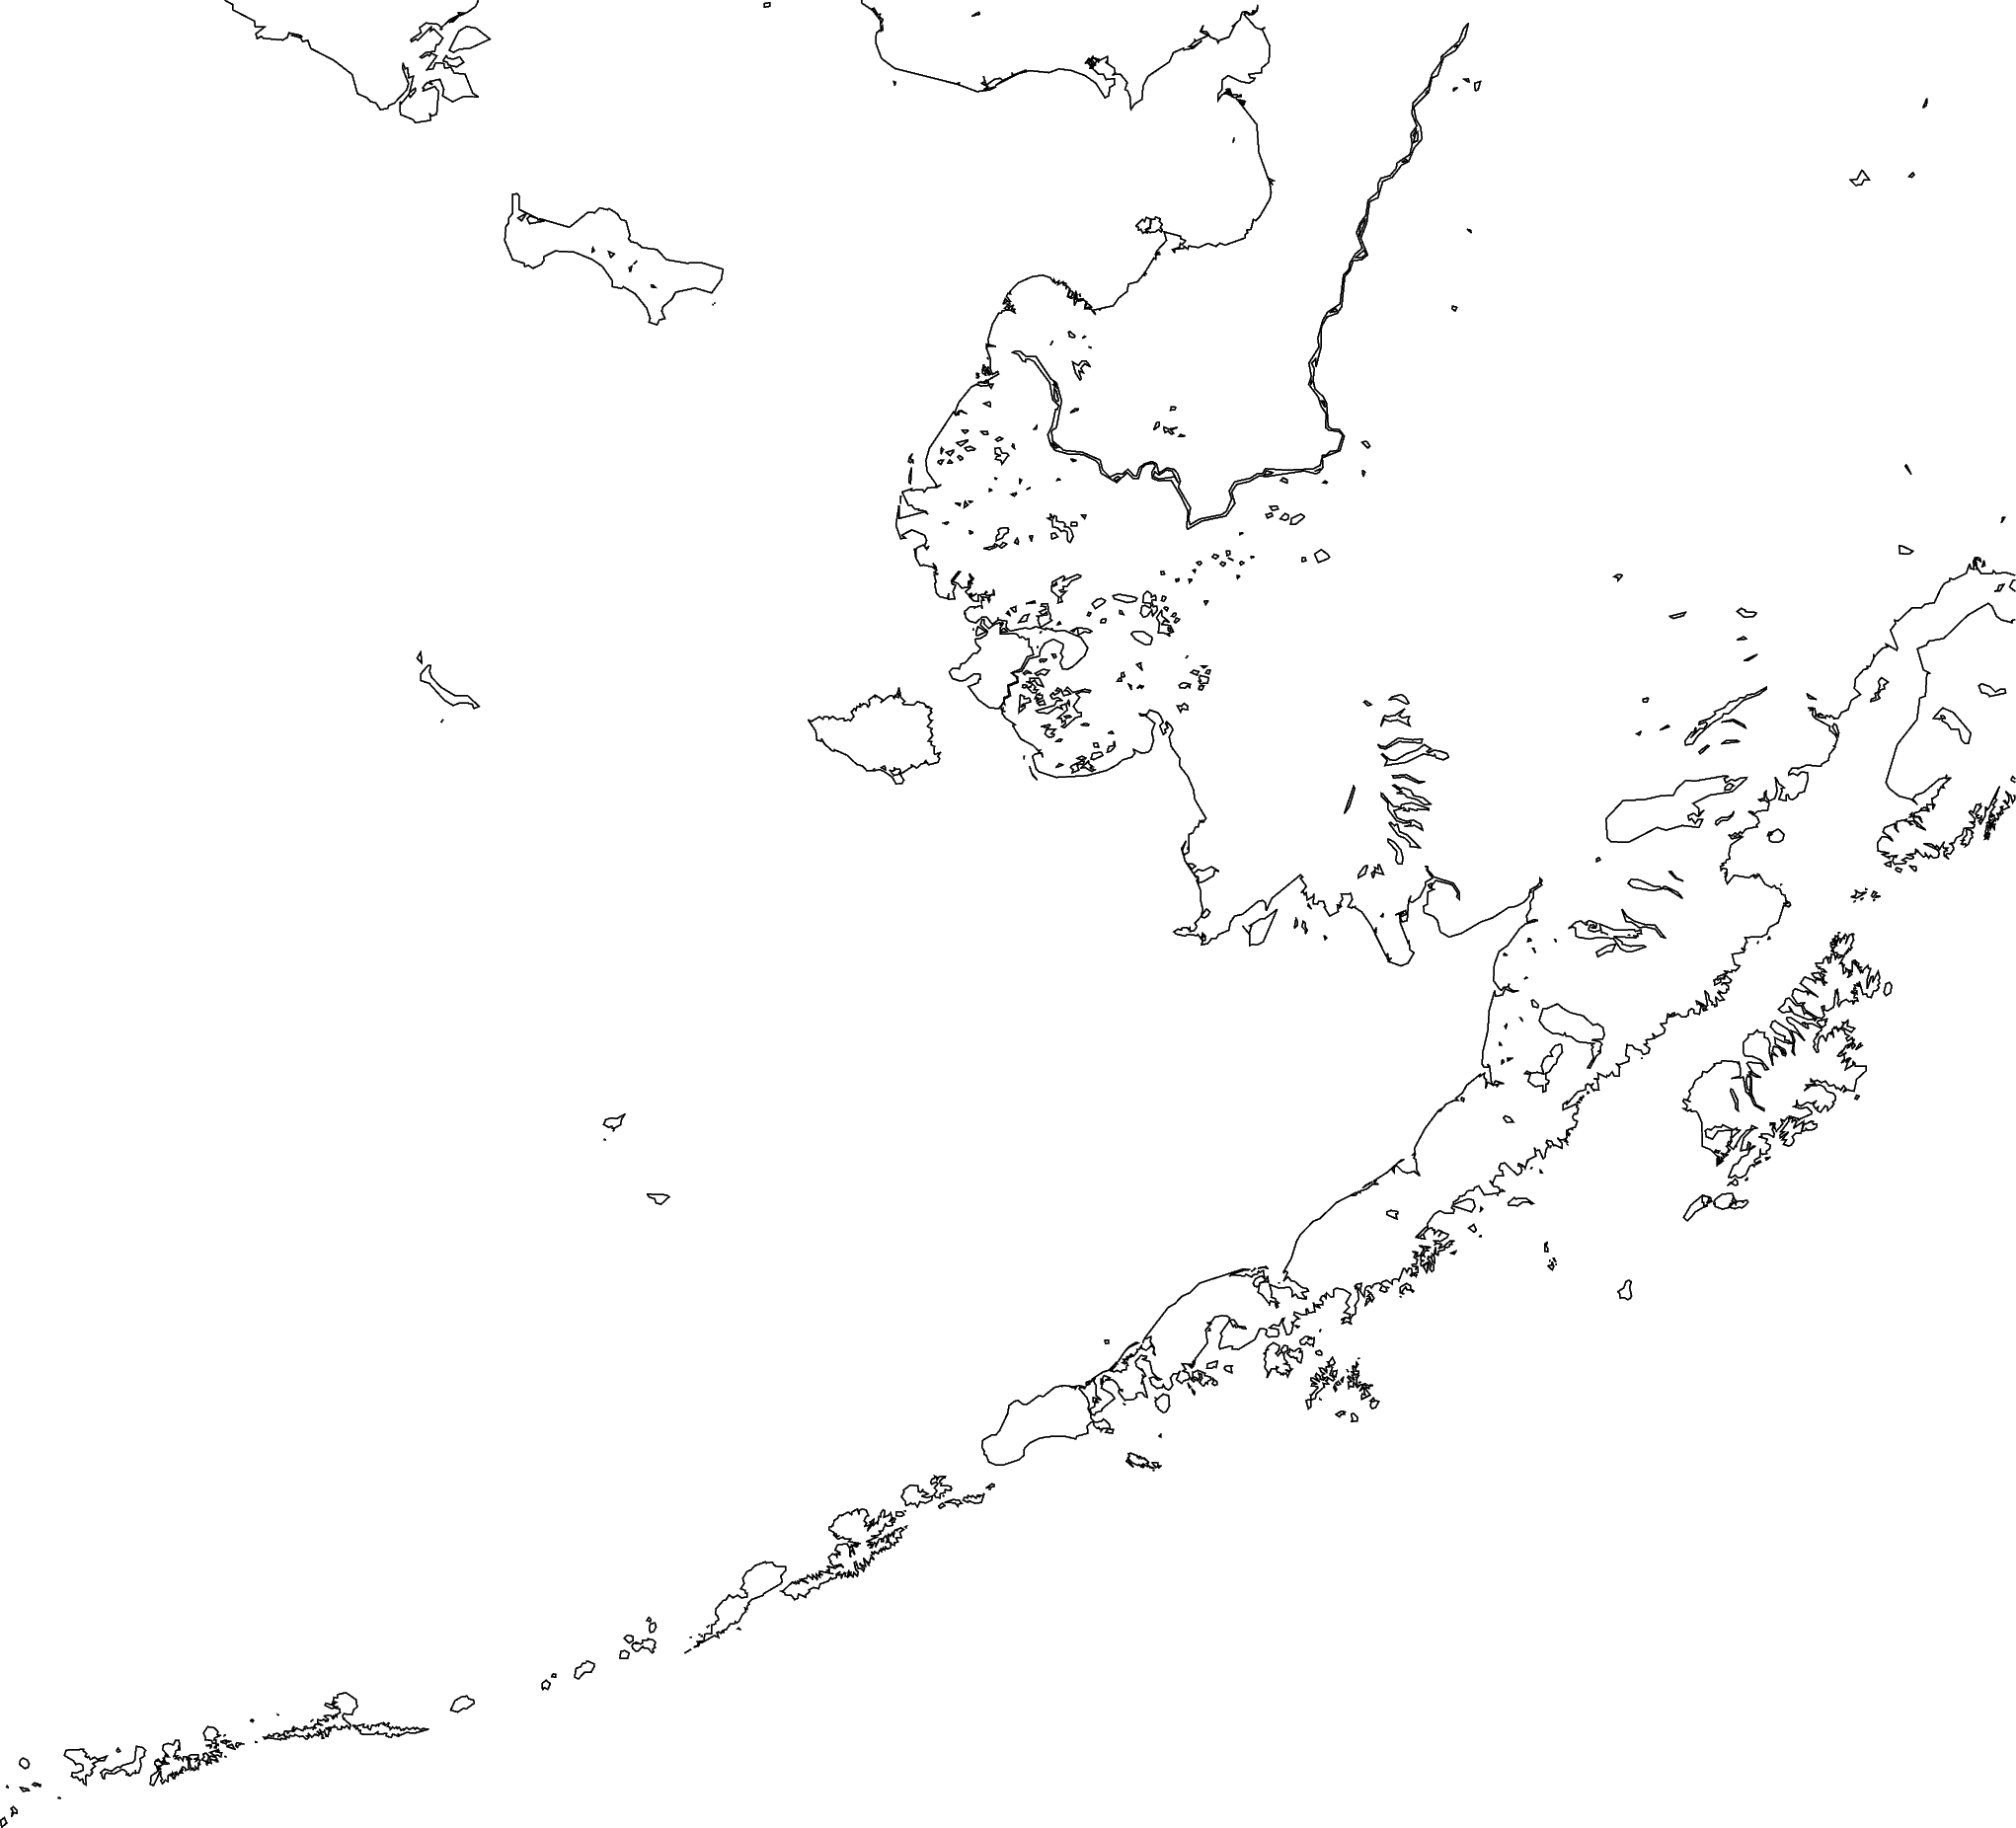

In [37]:
fig.coast(region = [-180, -150, 50, 65], 
          projection = 'M7i',
          shorelines=True)
fig.show() # To see the figure looks like

#### Coloring and add map element (frame and ticks)! 
1. Axis labels `WSne`: If an upper-case letter (W, S, N, E) is passed, the axis is plotted with tick marks and annotations. The lower-case version (w, s, n, e) plots the axis only with tick marks. To only plot the axis pass (l, b, t, r).
2. annotations `a`: tick labels, marking your tick label interval with 10. 
3. frame `f`: ticks
4. grid `g`: grid line in 

> More detail for frame https://www.pygmt.org/dev/tutorials/basics/frames.html

> More color https://docs.generic-mapping-tools.org/dev/_images/GMT_RGBchart.png 

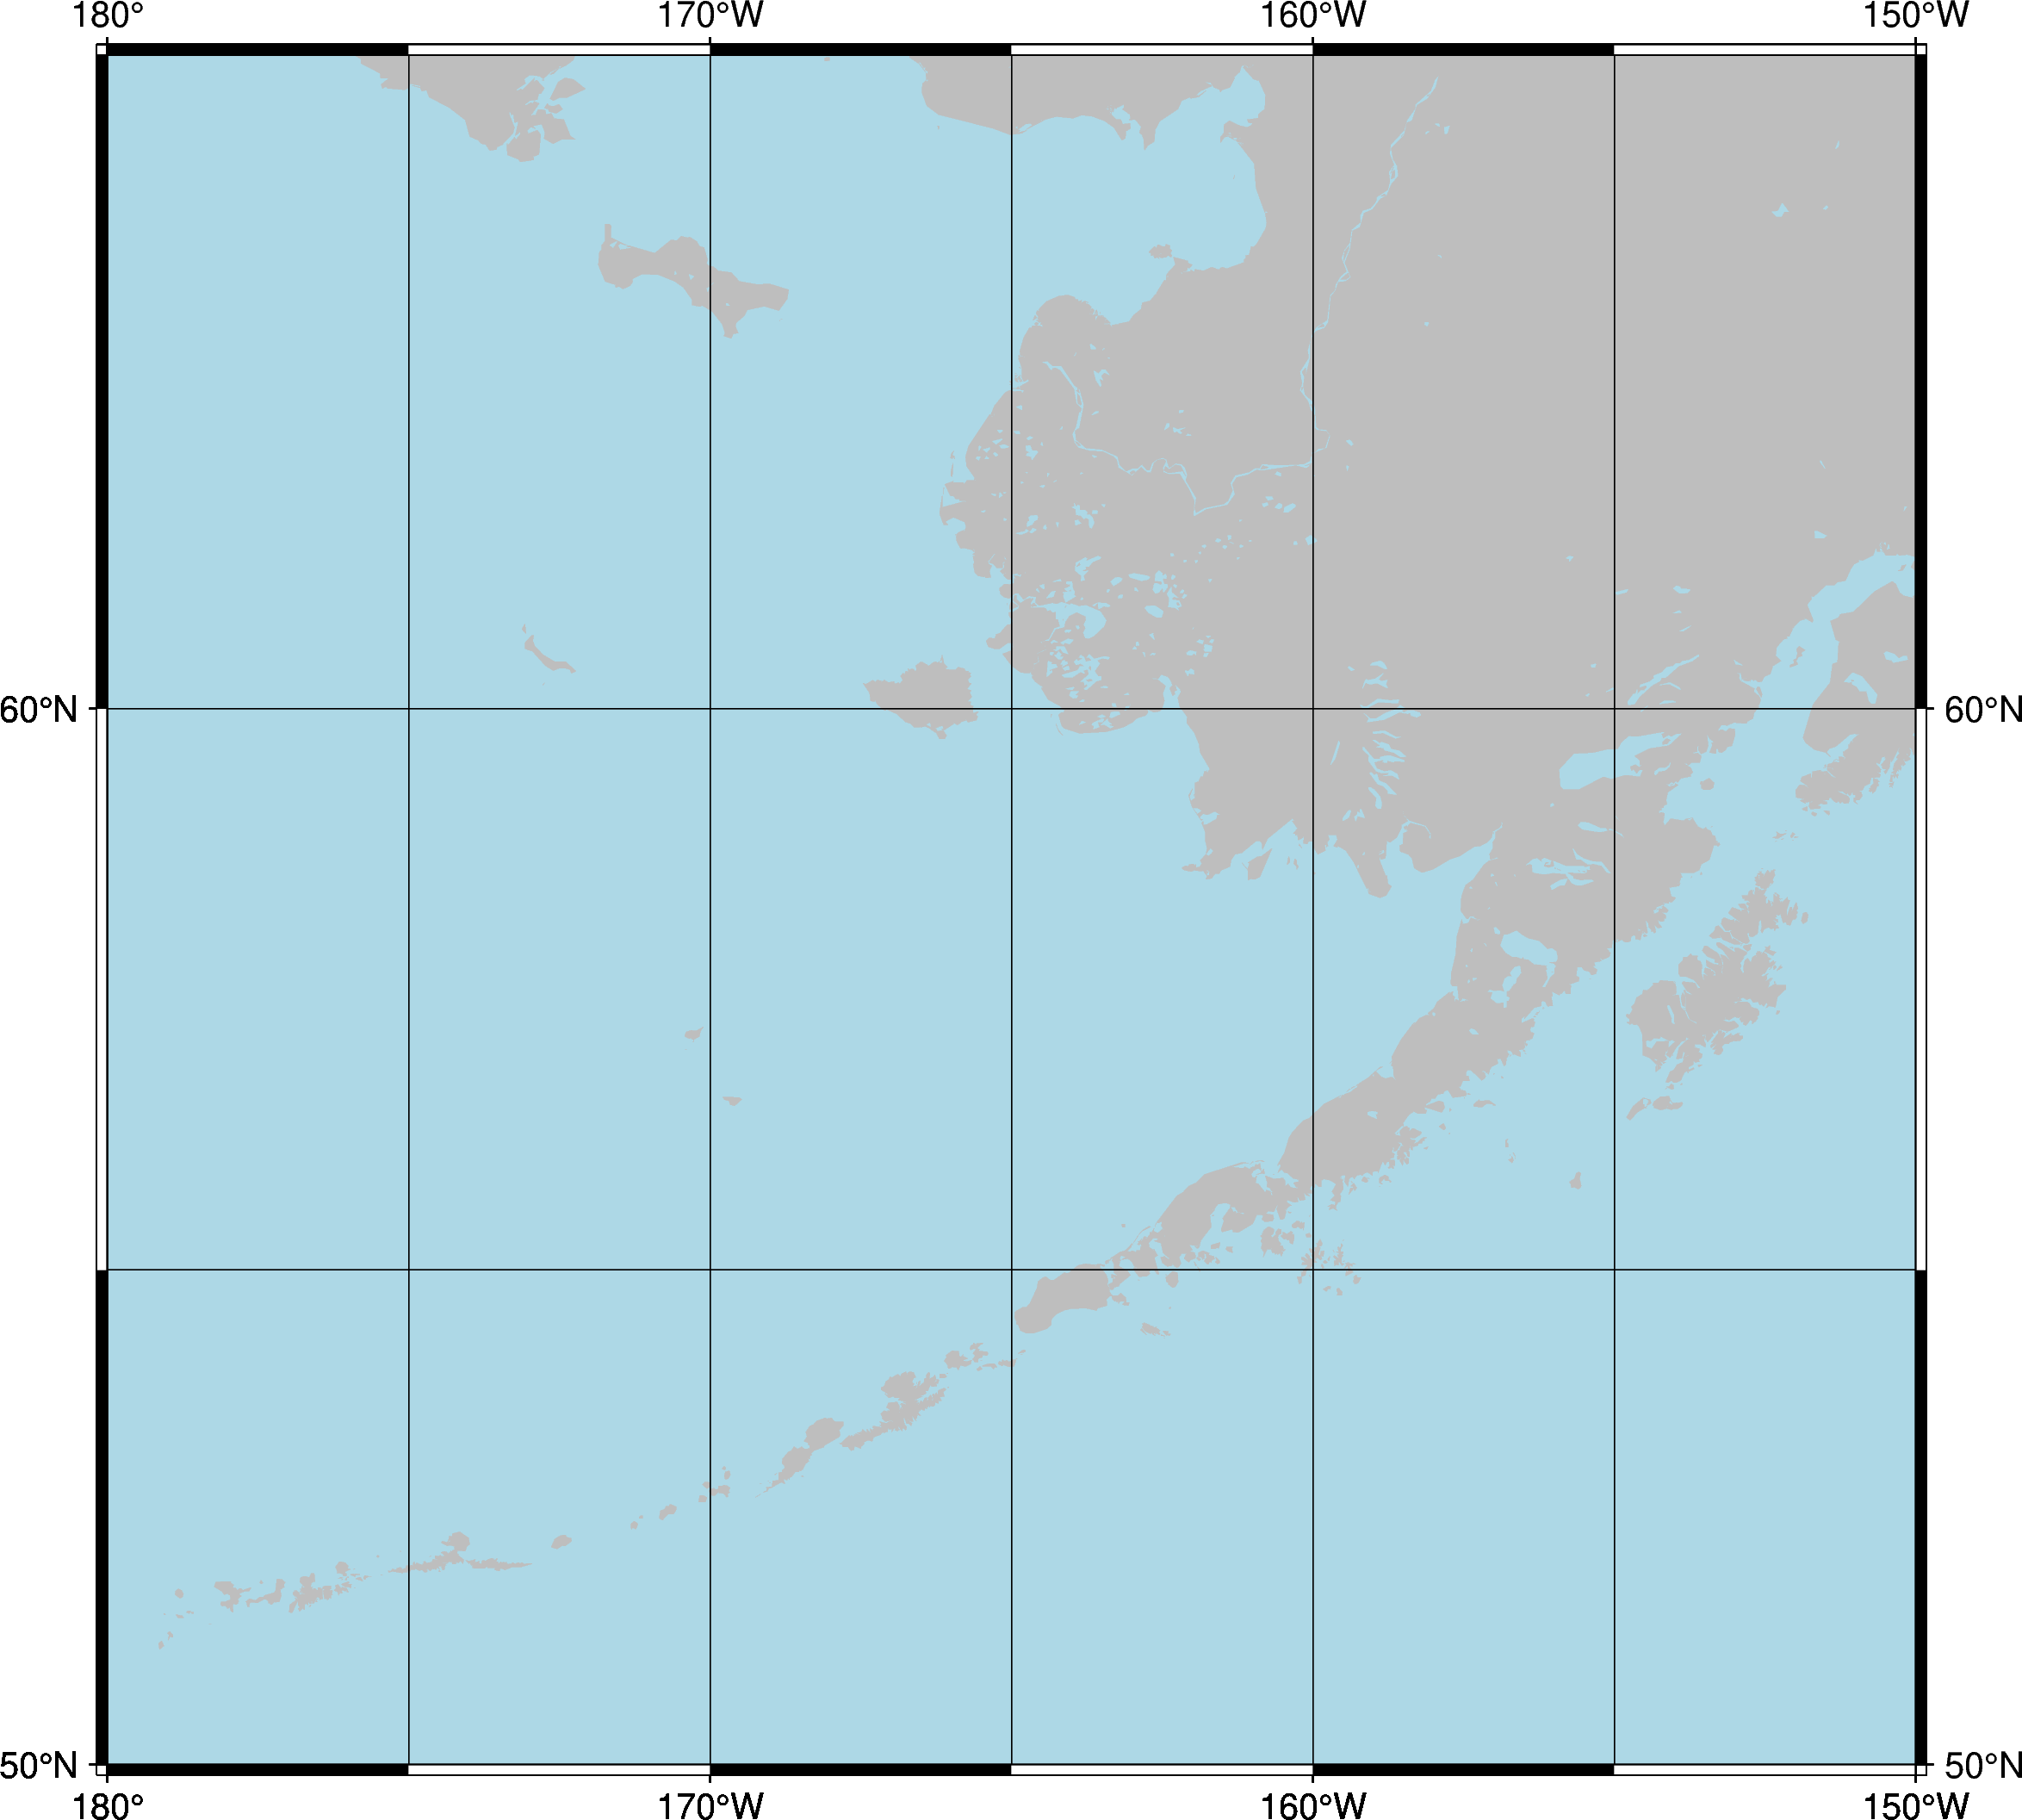

In [41]:
fig.coast(water='lightblue', 
          land='grey',
          frame=['WSne','a10f5g5']) 
fig.show()

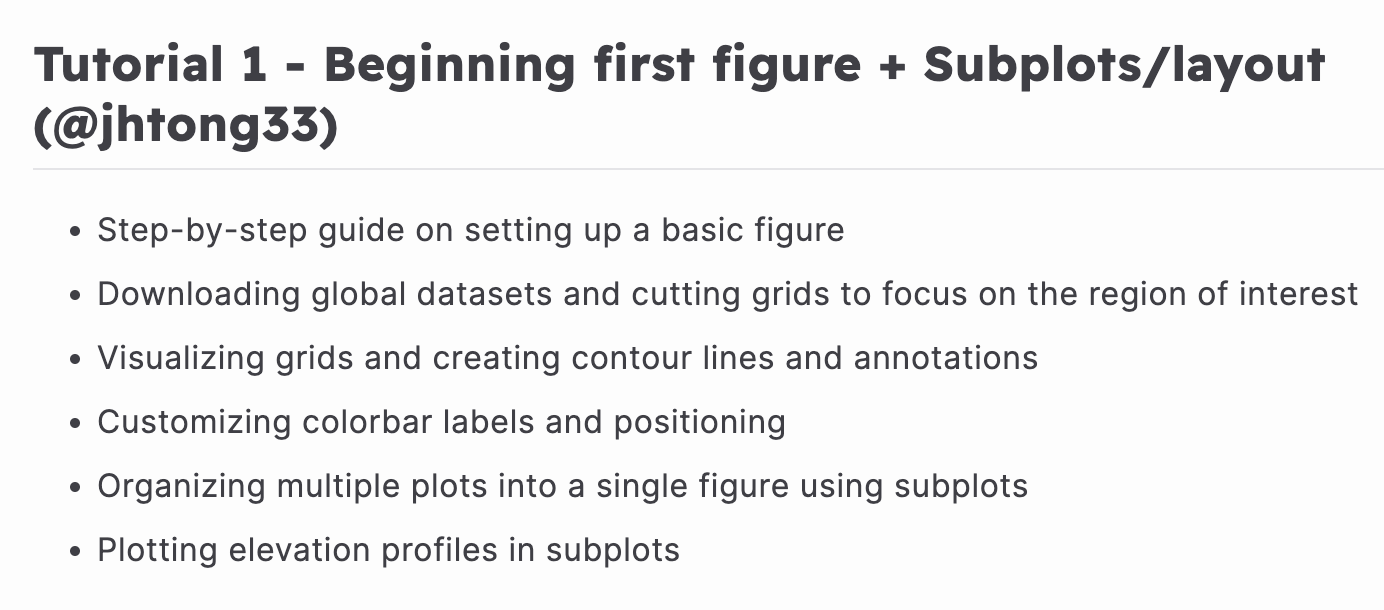